<a href="https://colab.research.google.com/github/VineetMakharia/NN-ipynbs/blob/main/ALDA_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from google.colab import files   
uploaded = files.upload()

Saving Spotify.csv to Spotify.csv


In [101]:
import io 
  
dataset = pd.read_csv(io.BytesIO(uploaded['Spotify.csv'])) 
dataset.head()

genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 18 columns]

- **duration_ms:** The duration of the track in milliseconds.
- **key:** 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **mode:** 	Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- **instrumentalness:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

## Data Cleaning

In [102]:
dataset = dataset.drop_duplicates()

In [103]:
dataset.describe()

popularity   acousticness  ...          tempo        valence
count  232725.000000  232725.000000  ...  232725.000000  232725.000000
mean       41.127502       0.368560  ...     117.666585       0.454917
std        18.189948       0.354768  ...      30.898907       0.260065
min         0.000000       0.000000  ...      30.379000       0.000000
25%        29.000000       0.037600  ...      92.959000       0.237000
50%        43.000000       0.232000  ...     115.778000       0.444000
75%        55.000000       0.722000  ...     139.054000       0.660000
max       100.000000       0.996000  ...     242.903000       1.000000

[8 rows x 11 columns]

In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [105]:
pd.isnull(dataset).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## Dropping the artist name, track name, the track id since they won't help us

In [106]:
columns = ['artist_name', 'track_name', 'track_id']
dataset = dataset.drop(labels=columns, axis=1)

## Need to convert the genre and other variables to numbers

In [109]:
dataset[['genre']] = dataset[['genre']].apply(lambda col:pd.Categorical(col).codes)
dataset[['key']] = dataset[['key']].apply(lambda col:pd.Categorical(col).codes)
dataset.loc[dataset["mode"] == 'Major', "mode"] = 1
dataset.loc[dataset["mode"] == 'Minor', "mode"] = 0
time_signature_indices = list(dataset['time_signature'].unique())
for i in range(len(time_signature_indices)):
    dataset.loc[dataset['time_signature'] == time_signature_indices[i], 'time_signature'] = i
dataset.loc[dataset.popularity <= 50 , 'popularity'] = 0
dataset.loc[dataset.popularity > 50 , 'popularity'] = 1

In [110]:
dataset.describe()

genre     popularity  ...          tempo        valence
count  232725.000000  232725.000000  ...  232725.000000  232725.000000
mean       13.623324       0.342043  ...     117.666585       0.454917
std         7.491245       0.474395  ...      30.898907       0.260065
min         0.000000       0.000000  ...      30.379000       0.000000
25%         7.000000       0.000000  ...      92.959000       0.237000
50%        14.000000       0.000000  ...     115.778000       0.444000
75%        20.000000       1.000000  ...     139.054000       0.660000
max        26.000000       1.000000  ...     242.903000       1.000000

[8 rows x 13 columns]

# Exploratory Data Analysis

In [111]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

In [112]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print('The most linear correlated features to POPULARITY are:')
for i, row in enumerate(series):
    if 0.2 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

The most linear correlated features to POPULARITY are:
loudness          -->  0.28 (abs)
acousticness      -->  0.27 (abs)
danceability      -->  0.23 (abs)
instrumentalness  -->  0.23 (abs)


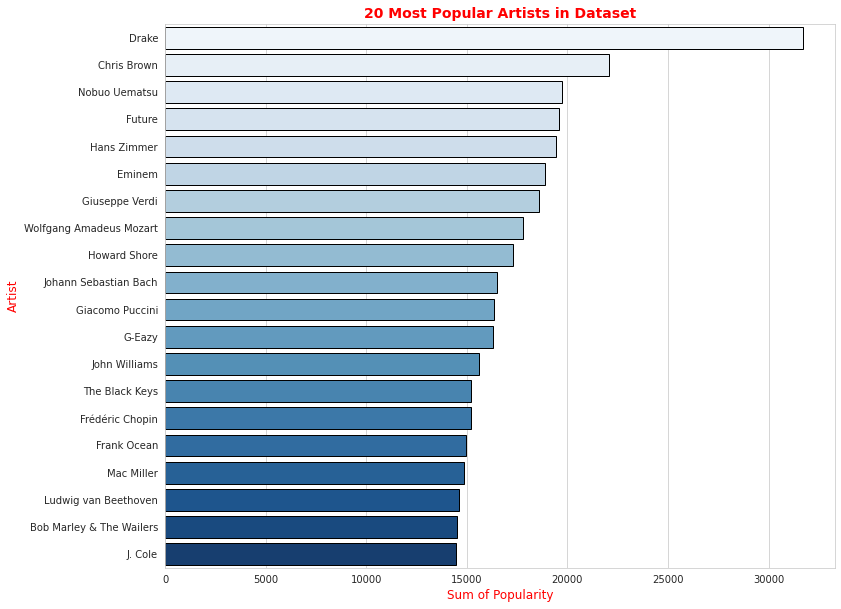

In [118]:
df = pd.read_csv(io.BytesIO(uploaded['Spotify.csv'])) 
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('artist_name')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

Mean value of Acousticness is 0.36856045175644825


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


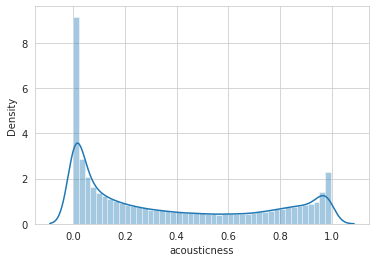

In [119]:
print('Mean value of Acousticness is',dataset['acousticness'].mean())
sns.distplot(dataset["acousticness"])

Most of the songs are non acoustic songs and relatively fewer songs are distributed in between and the average is shifted to the left. The acousticness has a bimodal distribution

Mean value of Danceability is 0.5543644692233398


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


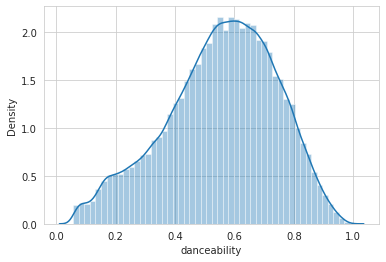

In [120]:
print('Mean value of Danceability is',dataset['danceability'].mean())
sns.distplot(dataset["danceability"])

Most songs have high danceability and the danceability seems to follow a normal distribution

Mean value of duration in milliseocnds is 235122.3393060479


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


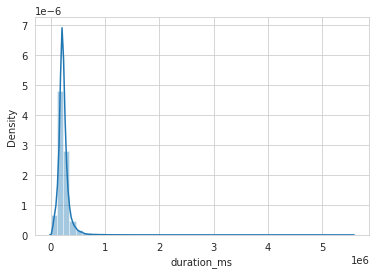

In [121]:
print('Mean value of duration in milliseocnds is',dataset['duration_ms'].mean())
sns.distplot(dataset["duration_ms"] )

The distribution is "Right Skewed" with very few songs having huge duration.

Mean value of energy is 0.57095767347127


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


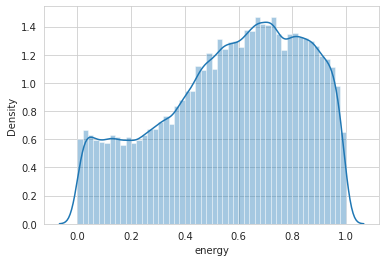

In [122]:
print('Mean value of energy is',dataset['energy'].mean())
sns.distplot(dataset["energy"])

Interesting!

Mean value of instrumentalness is 0.1483012336397001


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


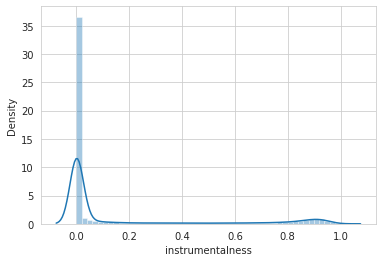

In [123]:
print('Mean value of instrumentalness is',dataset['instrumentalness'].mean())
sns.distplot(dataset["instrumentalness"])

The distribution is "Right Skewed" and almost 70% of the data has the least instrumentalness. The average instrumentalness is 0.162

Interesting!

Mean value of liveness is 0.21500928452036241


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


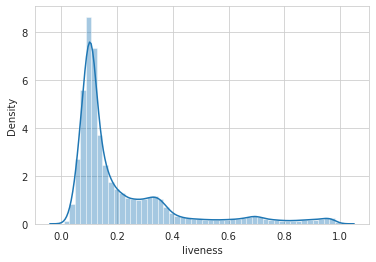

In [124]:
print('Mean value of liveness is',dataset['liveness'].mean())
sns.distplot(dataset["liveness"])

Most of the songs have less liveliness and most lie around 0.21.

Mean value of loudness is -9.569885401224399


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


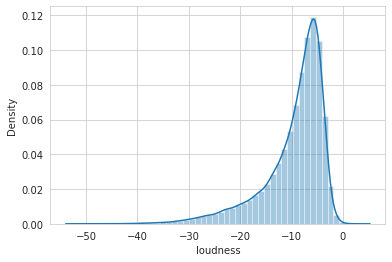

In [125]:
print('Mean value of loudness is',dataset['loudness'].mean())
sns.distplot(dataset["loudness"])

Most of the songs have a loudness around -9.57dB

Mean value of speechiness is 0.12076501450209653


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


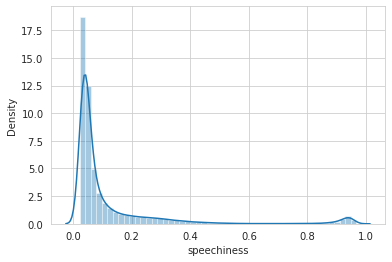

In [126]:
print('Mean value of speechiness is',dataset['speechiness'].mean())
sns.distplot(dataset["speechiness"])

“Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech. So most of the songs do not have any speech as the average is very low.

Mean value of tempo is 117.66658489203478


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


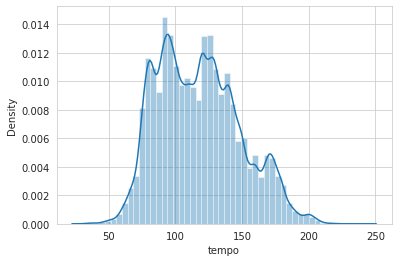

In [127]:
print('Mean value of tempo is',dataset['tempo'].mean())
sns.distplot(dataset["tempo"])

Tempo seems to be pretty high with multiple peaks

Mean value of valence is 0.45491685594586073


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


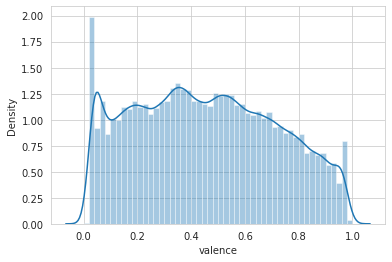

In [128]:
print('Mean value of valence is',dataset['valence'].mean())
sns.distplot(dataset["valence"])

Valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The songs here seem to be a mix of all kinds of songs

Text(0.5, 1.0, 'Popularity Based on Time Signature')

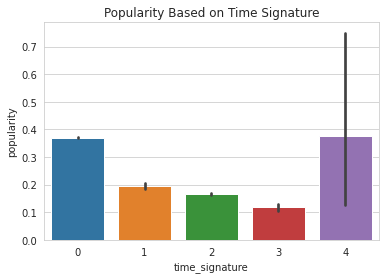

In [129]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataset)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

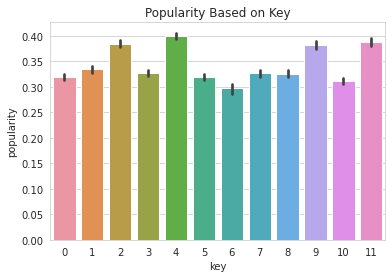

In [130]:
sns.barplot(x = 'key', y = 'popularity', data = dataset)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

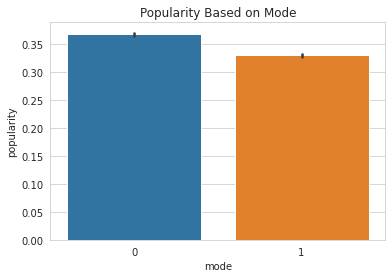

In [131]:
sns.barplot(x = 'mode', y = 'popularity', data = dataset)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

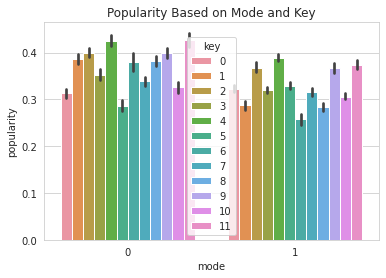

In [132]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataset)
plt.title('Popularity Based on Mode and Key')

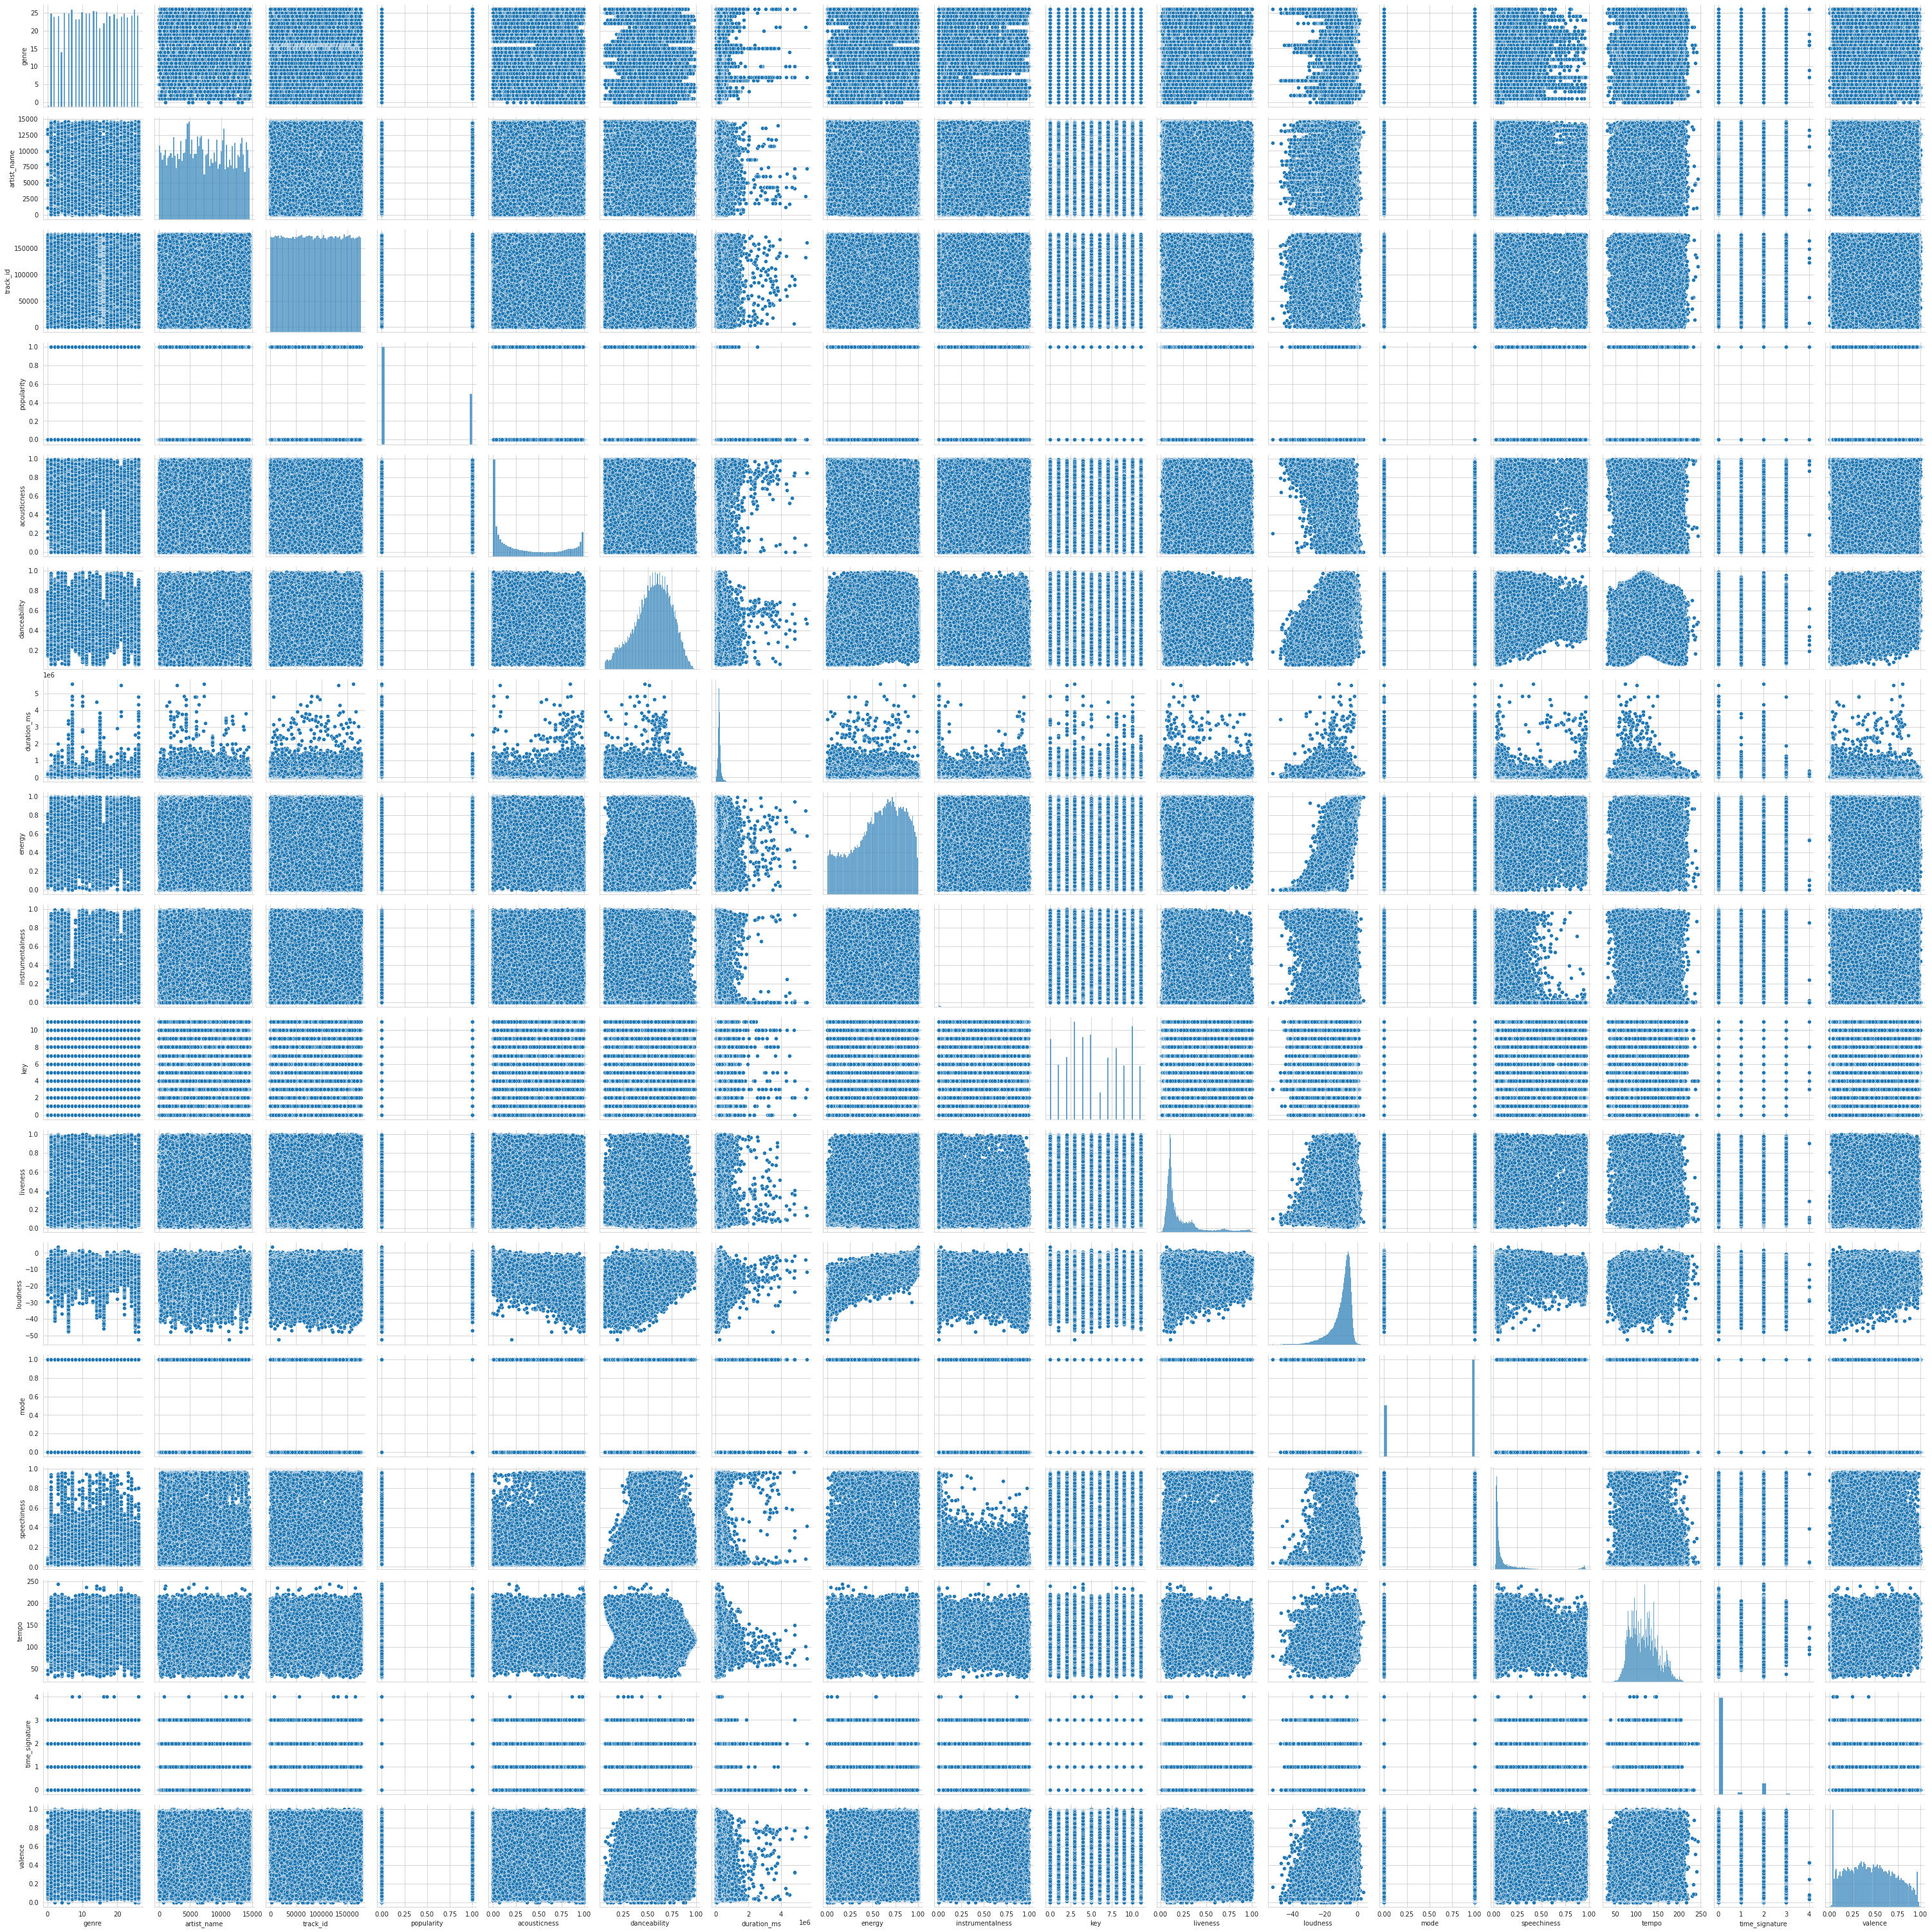

In [25]:
 sns.pairplot(dataset)

## Building models on the data set now that we're done with EDA

## KNN for popularity prediction

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
import cv2
from sklearn.linear_model import LogisticRegression

In [147]:
X = dataset.drop(columns=['popularity'])
y = dataset['popularity']

In [148]:
scaler_standard = StandardScaler()
X = scaler_standard.fit_transform(X)

In [150]:
# Splitting data into train, test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [151]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
predicted_popularity_KNN = model_KNN.predict(X_valid)
model_accuracy_KNN = accuracy_score(y_valid, predicted_popularity_KNN)
print("Accuracy: " + str(model_accuracy_KNN))

Accuracy: 0.7422924051992695


In [152]:
print(classification_report(y_valid, predicted_popularity_KNN))
#Checking performance with ROC Score.
roc_KNN = roc_auc_score(y_valid, predicted_popularity_KNN)
print("ROC: " + str(roc_KNN))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     30730
           1       0.62      0.61      0.62     15815

    accuracy                           0.74     46545
   macro avg       0.71      0.71      0.71     46545
weighted avg       0.74      0.74      0.74     46545

ROC: 0.7103697631014477


# Genre Classification

In [153]:
X_genre = dataset.drop(columns = ['genre'])
y_genre = dataset['genre']
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_genre, X_valid_genre, y_train_genre, y_valid_genre = train_test_split(X_train_genre, y_train_genre, test_size=0.2, random_state=1)

In [154]:
X_genre = scaler_standard.fit_transform(X_genre)

In [155]:
model_KNN_genre = KNeighborsClassifier()
model_KNN_genre.fit(X_train_genre, y_train_genre)
predicted_popularity_KNN_genre = model_KNN_genre.predict(X_valid_genre)
model_accuracy_KNN_genre = accuracy_score(y_valid_genre, predicted_popularity_KNN_genre)
print("Accuracy: " + str(model_accuracy_KNN_genre))

Accuracy: 0.7450585454936083


In [156]:
print(classification_report(y_valid_genre, predicted_popularity_KNN_genre))
#Checking performance our model with ROC Score.
roc_KNN_genre = roc_auc_score(y_valid_genre, predicted_popularity_KNN_genre)
print("ROC: " + str(roc_KNN_genre))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     24564
           1       0.63      0.62      0.62     12672

    accuracy                           0.75     37236
   macro avg       0.72      0.71      0.71     37236
weighted avg       0.74      0.75      0.74     37236

ROC: 0.7141058815746621


In [157]:
model_KNN_genre = KNeighborsClassifier(n_neighbors= 10)
model_KNN_genre.fit(X_train_genre, y_train_genre)
predicted_popularity_KNN_genre = model_KNN_genre.predict(X_valid_genre)
model_accuracy_KNN_genre = accuracy_score(y_valid_genre, predicted_popularity_KNN_genre)
print("Accuracy: " + str(model_accuracy_KNN_genre))

Accuracy: 0.7474755612847782


## Naive Bayes

In [165]:
def NaiveBayes(trainX, trainY, testX, testY):
  model = GaussianNB()
  model.fit(trainX, trainY)
  NB_pred = model.predict(testX)
  print(classification_report(testY, NB_pred))
  roc_NB = roc_auc_score(testY, NB_pred)
  print("ROC: " + str(roc_NB))

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [167]:
NaiveBayes(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.51      0.63     30750
           1       0.46      0.82      0.59     15795

    accuracy                           0.61     46545
   macro avg       0.65      0.66      0.61     46545
weighted avg       0.72      0.61      0.62     46545

ROC: 0.6641905048680117


## Decision Tree

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [176]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
dt1 = clf1.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Decision Tree with Entropy -")
print(classification_report(y_test, dt1))
roc_dt1 = roc_auc_score(y_test, dt1)
print("ROC: " + str(roc_dt1))

clf2 = DecisionTreeClassifier(criterion='gini', max_depth=6)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
dt2 = clf2.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("\nDecision Tree with Gini -")
print(classification_report(y_test, dt2))
roc_dt2 = roc_auc_score(y_test, dt2)
print("ROC: " + str(roc_dt2))

Decision Tree with Entropy -
              precision    recall  f1-score   support

           0       0.76      0.95      0.84     30750
           1       0.81      0.41      0.54     15795

    accuracy                           0.77     46545
   macro avg       0.78      0.68      0.69     46545
weighted avg       0.78      0.77      0.74     46545

ROC: 0.6792039623530137

Decision Tree with Gini -
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     30750
           1       0.79      0.50      0.61     15795

    accuracy                           0.78     46545
   macro avg       0.79      0.72      0.73     46545
weighted avg       0.79      0.78      0.77     46545

ROC: 0.7158745048988953


## Logistic Regression

In [179]:
from sklearn.metrics import mean_squared_error as mse
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_test_pred = LR.predict(X_test)
print(classification_report(y_test, y_test_pred))
roc_dt2 = roc_auc_score(y_test, y_test_pred)
print("ROC: " + str(roc_dt2))


              precision    recall  f1-score   support

           0       0.73      0.85      0.79     30750
           1       0.58      0.39      0.46     15795

    accuracy                           0.70     46545
   macro avg       0.65      0.62      0.63     46545
weighted avg       0.68      0.70      0.68     46545

ROC: 0.6213281140218809


In [180]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.096
Model:                            OLS   Adj. R-squared (uncentered):              0.096
Method:                 Least Squares   F-statistic:                              1417.
Date:                Fri, 06 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:25:58   Log-Likelihood:                     -1.5506e+05
No. Observations:              186180   AIC:                                  3.102e+05
Df Residuals:                  186166   BIC:                                  3.103e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0157      0.001     11.967      0.000       0.013       0.018
x2            -0.0713      0.002    -33.057      0.000      -0.076      -0.067
x3             0.0718      0.002     40.184      0.000       0.068       0.075
x4            -0.0107      0.001     -8.137      0.000      -0.013      -0.008
x5            -0.0492      0.003    -17.029      0.000      -0.055      -0.044
x6            -0.0657      0.002    -41.606      0.000      -0.069      -0.063
x7             0.0034      0.001      2.597      0.009       0.001       0.006
x8            -0.0406      0.002    -26.024      0.000      -0.044      -0.038
x9             0.0818      0.003     30.943      0.000       0.077       0.087
x10           -0.0106      0.001     -8.120      0.000      -0.013      -0.008
x11           -0.0079      0.002     -4.665      0.000      -0.011      -0.005
x12           -0.0014      0.001     -1.067      0.286      -0.004       0.001
x13           -0.0135      0.001     -9.490      0.000      -0.016      -0.011
x14           -0.0683      0.002    -40.459      0.000      -0.072      -0.065
==============================================================================
Omnibus:                  3757577.399   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19541.147
Skew:                           0.419   Prob(JB):                         0.00
Kurtosis:                       1.652   Cond. No.                         5.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""